In [2]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from src.eval import calculate_rouge

In [4]:
df = pd.read_csv("data/debatesum/test.csv")

scores = json.load(open("results/checkpoint-1500_debatesum_scores", "r"))
with open("results/checkpoint-1500_debatesum_sentences") as file:
    texts = [line.rstrip() for line in file]

In [6]:
metric = list[float]()
for pred, label in zip(texts, df["target"]):
    rouge = calculate_rouge(predictions=[pred], references=[[label]])["rougeL"]
    metric.append(rouge)

In [7]:
df_score = pd.DataFrame(
    {
        "rougel_3": metric,
        "cert_3": scores["99"],
    }
)

In [8]:
np.corrcoef(df_score["rougel_3"], df_score["cert_3"])

array([[1.        , 0.62785068],
       [0.62785068, 1.        ]])

Text(0.5, 1.0, 'DebateSumm')

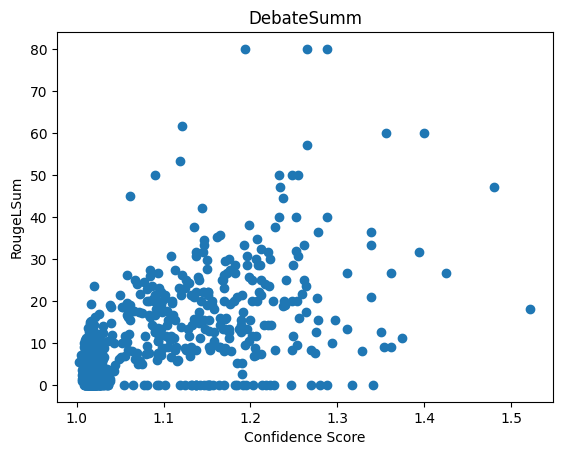

In [19]:
plt.scatter(y=df_score["rougel_3"], x=df_score["cert_3"])
plt.xlabel("Confidence Score")
plt.ylabel("RougeLSum")
plt.title("DebateSumm")

/home/mila/f/floresl/miniconda3/envs/al/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/mila/f/floresl/miniconda3/envs/al/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Text(0.5, 1.0, 'DebateSumm')

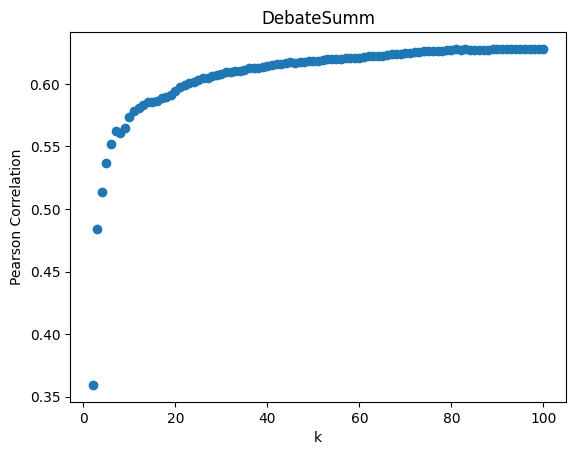

In [18]:
correlations = [
    np.corrcoef(df_score["rougel_3"], scores[str(k)])[0, 1] for k in range(100)
]
plt.scatter(x=list(range(1, 101)), y=correlations)
plt.xlabel("k")
plt.ylabel("Pearson Correlation")
plt.title("DebateSumm")